## Import Essentials

In [90]:
# Essentials
import numpy as np
import pandas as pd
import datetime
from sklearn import datasets
from typing import Tuple
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.decomposition import PCA

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
    
import os
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score

# data visualization
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score

#classifier
from sklearn.ensemble import RandomForestClassifier

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

<IPython.core.display.Javascript object>

## Loading Datasets

In [4]:
import numpy as np
from typing import Tuple

def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['features'], data['domains'], data['digits']

features_train, domains_train, digits_train = \
    load_data('train_data.npz')

print(features_train.shape)
print(np.unique(domains_train, return_counts=True))

features_test, domains_test, digits_test = \
    load_data('test_data.npz')
print(features_test.shape)
print(np.unique(domains_test, return_counts=True))



(25000, 1024)
(array([0, 1, 2, 3, 4], dtype=int64), array([5000, 5000, 5000, 5000, 5000], dtype=int64))
(25000, 1024)
(array([0, 1, 2, 3, 4], dtype=int64), array([5000, 5000, 5000, 5000, 5000], dtype=int64))


# Part1

### Instantiate the default random forest classifier 

In [6]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)

In [7]:
print(accuracy_score(digits_test, y_pred))

0.86208


### Now we try to check the effect and application of different parameters step by step and try to reach a logical conclusion

### n_estimators: This parameter controls the number of trees in the forest. Increasing this parameter may lead to better performance, but it could also increase the risk of overfitting. Let's try increasing it to 100 and see how it affects the accuracy.

In [71]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100: 0.86208


### adjusting n_estimators=100 did not changed the accuracy

### max_depth - This parameter controls the maximum depth of each decision tree in the forest. Increasing this parameter can increase the complexity of the model, but it can also increase the risk of overfitting. Let's try setting it to 10 and see how it affects the accuracy.

In [72]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100 and max_depth=10:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100 and max_depth=10: 0.82868


### Adjusting max_depth=10 decreases the accuracy score 


### min_samples_split: This parameter sets the minimum number of samples required to split an internal node. A higher value can help to prevent overfitting by creating simpler trees. Let's try setting it to 5 and see how it affects the accuracy.

In [ ]:
# Adjusting min_samples_split
rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5)
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100, max_depth=10, and min_samples_split=5:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100, max_depth=10, and min_samples_split=5: 0.82996


### A little improvment by adding this parameter

### max_features: This parameter controls the number of features to consider when looking for the best split. A lower value can help to prevent overfitting by reducing the variance between trees. Let's try setting it to "sqrt" which means that it will use the square root of the total number of features.

In [74]:
# Adjusting max_features
rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5, max_features="sqrt")
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, and max_features=sqrt:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, and max_features=sqrt: 0.82996


### No change in the accuracy score

### min_samples_leaf: This parameter sets the minimum number of samples required to be at a leaf node. Increasing this parameter can help to prevent overfitting by creating simpler trees. Let's try setting it to 3.

In [75]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5, max_features="sqrt", min_samples_leaf=3)
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, max_features=sqrt, and min_samples_leaf=3:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, max_features=sqrt, and min_samples_leaf=3: 0.8298


### Almost unchanged

### criterion: This parameter determines the function used to measure the quality of a split. The "gini" criterion is the default and measures the impurity of the branches. Another option is "entropy," which measures the amount of information gained from each split. Let's try using "entropy".

In [76]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5, max_features="sqrt", min_samples_leaf=3, criterion="entropy")
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, max_features=sqrt, min_samples_leaf=3, and criterion=entropy:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, max_features=sqrt, min_samples_leaf=3, and criterion=entropy: 0.84208


### Two percent improvement in in accuracy score

### bootstrap: This parameter controls whether or not bootstrapping should be used when building trees. Bootstrapping involves sampling the training data with replacement, which can help to reduce variance in the model. Let's try turning it off.

In [77]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5, max_features="sqrt", min_samples_leaf=3, criterion="entropy", bootstrap=False)
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, max_features=sqrt, min_samples_leaf=3, criterion=entropy, and bootstrap=False:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=100, max_depth=10, min_samples_split=5, max_features=sqrt, min_samples_leaf=3, criterion=entropy, and bootstrap=False: 0.84772


### it is getting better!

### class_weight: This parameter can be used to weight the contribution of different classes in the model. Classes that are more important can be given a higher weight, which can help to improve performance. Let's try setting the class_weight parameter to "balanced."

### and also Let's try increasing the number of estimators to 200.

In [78]:
rfc = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=10, min_samples_split=5, max_features="sqrt", min_samples_leaf=3, criterion="entropy", bootstrap=False, class_weight="balanced")
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=200, max_depth=10, min_samples_split=5, max_features=sqrt, min_samples_leaf=3, criterion=entropy, bootstrap=False, and class_weight=balanced:", accuracy_score(digits_test, y_pred))

Accuracy with n_estimators=200, max_depth=10, min_samples_split=5, max_features=sqrt, min_samples_leaf=3, criterion=entropy, bootstrap=False, and class_weight=balanced: 0.85796


### 1% improvment in accuracy score!

### Let's try decreasing the number of estimators to 150.

In [ ]:
rfc = RandomForestClassifier(random_state=0, n_estimators=150, min_samples_split=2, max_features="auto", min_samples_leaf=3, criterion="gini", bootstrap=True, class_weight="balanced")
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with n_estimators=150, max_depth=20, min_samples_split=2, max_features=auto, min_samples_leaf=3, criterion=gini, bootstrap=True, and class_weight=balanced:", accuracy_score(digits_test, y_pred))

### The score decreases! so n_estimator=200 seems to be a good parameter!

### Setting up the random state

In [ ]:
rfc = RandomForestClassifier(random_state=50, n_estimators=200, min_samples_split=10, max_features="sqrt", min_samples_leaf=3, criterion="entropy", bootstrap=False, class_weight="balanced")
rfc.fit(features_train, digits_train)
y_pred = rfc.predict(features_test)
print("Accuracy with random_state=50, n_estimators=200, max_depth=10, min_samples_split=10, max_features=sqrt, min_samples_leaf=3, criterion=entropy, bootstrap=False, and class_weight=balanced:", accuracy_score(digits_test, y_pred))

### Good! it seems that it is good to set random state and not leave it equal to zero!

### These are RandomizedSearchCV and gridsearch but i could not get the answers because of the run time!

In [69]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the hyperparameter search space
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': [5, 10, 20, None],
#     'min_samples_leaf': randint(1, 4),
#     'max_features': ['sqrt', 'log2', None]
# }

# # Instantiate the random forest classifier
# rfc = RandomForestClassifier(random_state=0)

# # Instantiate the randomized search object
# rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, cv=5, random_state=0)

# # Fit the randomized search object on the training data
# rand_search.fit(features_train, digits_train)

# # Print the best hyperparameters and corresponding accuracy score
# print("Best parameters found: ", rand_search.best_params_)
# print("Best accuracy found: ", rand_search.best_score_)


In [70]:
# # Set the best hyperparameters found from randomized search
# n_estimators = rand_search.best_params_['n_estimators']
# max_depth = rand_search.best_params_['max_depth']
# min_samples_leaf = rand_search.best_params_['min_samples_leaf']
# max_features = rand_search.best_params_['max_features']

# # Instantiate the random forest classifier with the best hyperparameters
# rfc_best = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
#                                    min_samples_leaf=min_samples_leaf, max_features=max_features,
#                                    random_state=0)

# # Fit the model on the training data
# rfc_best.fit(features_train, digits_train)


### let's merge all we found from the previous models, and train the final model

In [ ]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)

In [17]:
model.fit(features_train,digits_train)
y_pred = model.predict(features_test)
accuracy_score(digits_test, y_pred)

0.87224

### Good accuracy in predicting digits!

### According to the different parameters that we tested in different modes and checked their different results, we find that in order to avoid overfitting and get the best score, we should not set some parameters too much and others too little. For example, if we increase n_estimator, it will probably give us a better score, but it also increases the probability of overfit. Also, adjusting some parameters such as max_depth = 10 decreased the accuracy of our model at first, and after removing this parameter and applying the default value We saw that the score had a good improvement

### Confusion Matrix

### In multi-class classification, a confusion matrix is a table that is used to evaluate the performance of a machine learning model that predicts multiple classes or labels. The matrix is an extension of the binary confusion matrix and consists of rows and columns representing the predicted and actual class labels, respectively. Each cell in the matrix represents the number of instances that were classified as belonging to a particular class. In a multi-class problem with "k" classes, the confusion matrix will be a k x k table.The diagonal elements of the confusion matrix represent the number of correctly classified instances for each class, while the off-diagonal elements represent the misclassifications. Performance metrics such as precision, recall, accuracy and F1-score can be calculated using the values in the confusion matrix.

In [122]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

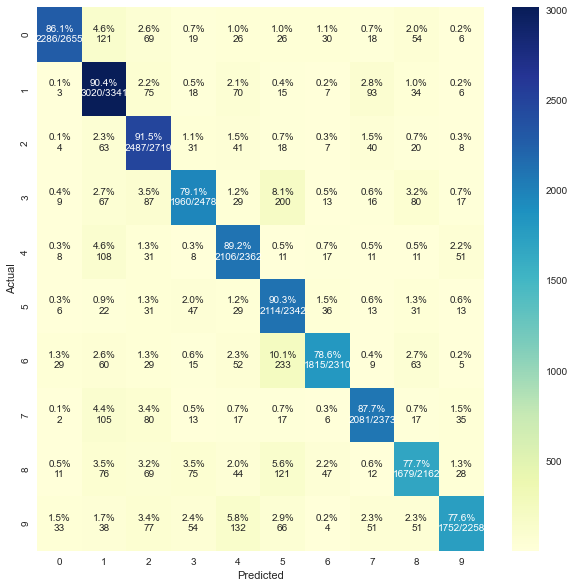

In [119]:
plot_cm(digits_test, y_pred)

In [115]:
confusion_matrix(digits_test, y_pred)

array([[2286,  121,   69,   19,   26,   26,   30,   18,   54,    6],
       [   3, 3020,   75,   18,   70,   15,    7,   93,   34,    6],
       [   4,   63, 2487,   31,   41,   18,    7,   40,   20,    8],
       [   9,   67,   87, 1960,   29,  200,   13,   16,   80,   17],
       [   8,  108,   31,    8, 2106,   11,   17,   11,   11,   51],
       [   6,   22,   31,   47,   29, 2114,   36,   13,   31,   13],
       [  29,   60,   29,   15,   52,  233, 1815,    9,   63,    5],
       [   2,  105,   80,   13,   17,   17,    6, 2081,   17,   35],
       [  11,   76,   69,   75,   44,  121,   47,   12, 1679,   28],
       [  33,   38,   77,   54,  132,   66,    4,   51,   51, 1752]],
      dtype=int64)

### These are RandomizedSearchCV and gridsearch but i could not get the answers because of the run time!

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the hyperparameter search space
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': [5, 10, 20, None],
#     'min_samples_leaf': randint(1, 4),
#     'max_features': ['sqrt', 'log2', None]
# }

# # Instantiate the random forest classifier
# rfc = RandomForestClassifier(random_state=0)

# # Instantiate the randomized search object
# rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, cv=5, random_state=0)

# # Fit the randomized search object on the training data
# rand_search.fit(features_train,digits_train)

# # Print the best hyperparameters and corresponding accuracy score
# print("Best parameters found: ", rand_search.best_params_)
# print("Best accuracy found: ", rand_search.best_score_)


In [ ]:


# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in range(200,2000,200)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)



In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(features_train,digits_train)

# Part2

### Training a model on 'domains' based on the parameters we have achieved in previous part

In [15]:
rfc = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
rfc.fit(features_train, domains_train)
y_pred = rfc.predict(features_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(domains_test, y_pred)

0.94104

### Good score! seems the parameters are tuned

### Confusion Matrix

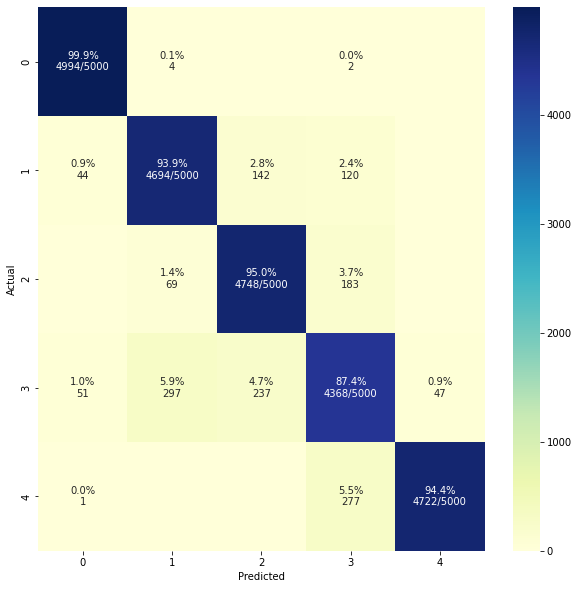

In [17]:
plot_cm(domains_test, y_pred)

### Splitting domains and training random forest models on each of them

### Domain = 0

In [25]:
features_domain_0 = features_train[domains_train == 0]
digits_domain_0 = digits_train[domains_train == 0]
features_test_0 = features_test[y_pred == 0]
digits_test_0 = digits_test[y_pred == 0]

model0 = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model0.fit(features_domain_0, digits_domain_0)
predictions_domain_0 = model0.predict(features_test_0)
print(accuracy_score(digits_test_0, predictions_domain_0))

0.9668639053254438


### Domain = 1

In [26]:
features_domain_1 = features_train[domains_train == 1]
digits_domain_1 = digits_train[domains_train == 1]
features_test_1 = features_test[y_pred == 1]
digits_test_1 = digits_test[y_pred == 1]

model1 = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model1.fit(features_domain_1, digits_domain_1)
predictions_domain_1 = model1.predict(features_test_1)
print(accuracy_score(digits_test_1, predictions_domain_1))

0.8373054953712823


### Domain = 2

In [30]:
features_domain_2 = features_train[domains_train == 2]
digits_domain_2 = digits_train[domains_train == 2]
features_test_2 = features_test[y_pred == 2]
digits_test_2 = digits_test[y_pred == 2]

model2 = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model2.fit(features_domain_2, digits_domain_2)
predictions_domain_2 = model2.predict(features_test_2)
print(accuracy_score(digits_test_2, predictions_domain_2))

0.746215844309023


### Domain = 3

In [28]:
features_domain_3 = features_train[domains_train == 3]
digits_domain_3 = digits_train[domains_train == 3]
features_test_3 = features_test[y_pred == 3]
digits_test_3 = digits_test[y_pred == 3]

model3 = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model3.fit(features_domain_3, digits_domain_3)
predictions_domain_3 = model3.predict(features_test_3)
print(accuracy_score(digits_test_3, predictions_domain_3))

0.8567449263828094


### Domain = 4

In [29]:
features_domain_4 = features_train[domains_train == 4]
digits_domain_4 = digits_train[domains_train == 4]
features_test_4 = features_test[y_pred == 4]
digits_test_4 = digits_test[y_pred == 4]

model4 = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model4.fit(features_domain_4, digits_domain_4)
predictions_domain_4 = model4.predict(features_test_4)
print(accuracy_score(digits_test_4, predictions_domain_4))

0.9827004219409282


## Part3

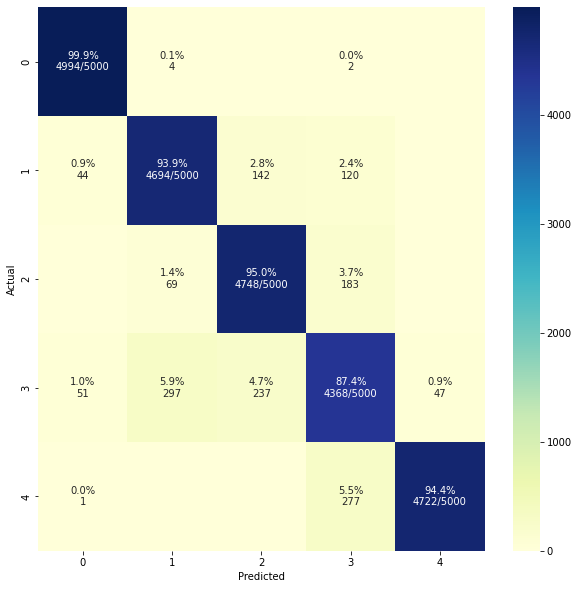

In [19]:
plot_cm(domains_test, y_pred)

In [20]:
confusion_matrix(domains_test, y_pred)

array([[4994,    4,    0,    2,    0],
       [  44, 4694,  142,  120,    0],
       [   0,   69, 4748,  183,    0],
       [  51,  297,  237, 4368,   47],
       [   1,    0,    0,  277, 4722]], dtype=int64)

### This is a confusion matrix, which is commonly used to evaluate the performance of a classification model. The rows in the matrix represent the actual classes, while the columns represent the predicted classes.
###    There are five possible classes, represented by the integers 0, 1, 2, 3, and 4.
###    The diagonal elements represent the number of instances that were correctly classified for each class. For example, there were 4994 instances of class 0 that were correctly classified, 4694 instances of class 1 that were correctly classified, and so on.
###    The off-diagonal elements represent the number of instances that were misclassified. For example, there were 44 instances of class 1 that were misclassified as class 0, 69 instances of class 2 that were misclassified as class 1, and so on.
### Overall, this confusion matrix suggests that the model performs well, with most of the instances being correctly classified. but we want to check if we can improve it or not!

In [23]:
from sklearn.metrics import confusion_matrix

# Calculate the recall score for each digit
cm = np.array([[4994,    4,    0,    2,    0],
               [  44, 4694,  142,  120,    0],
               [   0,   69, 4748,  183,    0],
               [  51,  297,  237, 4368,   47],
               [   1,    0,    0,  277, 4722]])

recall_scores = np.diag(cm) / cm.sum(axis=1)
print("Recall scores:", recall_scores)

Recall scores: [0.9988 0.9388 0.9496 0.8736 0.9444]


### What we are gonna do here: Create a dictionary to store the accuracies for different models - Loop through each domain - Split the training data into domain i and other domains - Predict labels for other domains - Calculate the weight for each sample from other domains based on the confusion matrix - Concatenate the data from domain i and the weighted data from other domains based on confusion matrix - Train a new RandomForestClassifier model with the weighted concatenated data - Test the model on the test data from domain i - Print the accuracies for each domain

In [63]:
accuracies = {}

for i in range(5):
    features_domain_i = features_train[domains_train == i]
    digits_domain_i = digits_train[domains_train == i]
    features_other_domains = features_train[domains_train != i]
    digits_other_domains = digits_train[domains_train != i]
    
    features_other_pred = features_train[domains_train != i]
    digits_other_pred = model.predict(features_other_pred)
    
    weights = np.zeros(len(digits_other_domains))
    for j in range(10):
        confusion_ij = confusion_matrix(digits_other_domains, digits_other_pred)[j][i]
        weights[digits_other_domains == j] = 1 / (1 + confusion_ij)
    
    features_new_train = np.concatenate((features_domain_i, features_other_domains), axis=0)
    digits_new_train = np.concatenate((digits_domain_i, digits_other_domains), axis=0)
    weights_new_train = np.concatenate((np.ones(len(digits_domain_i)), weights))
    
    model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42, class_weight='balanced_subsample')
    model.fit(features_new_train,digits_new_train, sample_weight=weights_new_train)
    
    features_test_i = features_test[domains_test == i]
    digits_test_i = digits_test[domains_test == i]
    predictions_domain_i = model.predict(features_test_i)
    accuracy_domain_i = accuracy_score(digits_test_i, predictions_domain_i)
    accuracies[f"Domain {i}"] = accuracy_domain_i

for domain, accuracy in accuracies.items():
    print(f"{domain}: {accuracy}")


Domain 0: 0.9762
Domain 1: 0.8454
Domain 2: 0.7482
Domain 3: 0.7916
Domain 4: 0.9888


### By adding data from other domains based on the confusion matrix and weighting them, we see that improvements have been made in the scores of 4 domains and only one domain's score has decreased.

In [84]:
accuracies = {}

for i in range(5):
    
    features_domain_i = features_train[domains_train == i]
    digits_domain_i = digits_train[domains_train == i]
    features_other_domains = features_train[domains_train != i]
    digits_other_domains = digits_train[domains_train != i]
    
    model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42, class_weight='balanced_subsample')
    model.fit(np.concatenate((features_domain_i, features_other_domains)), np.concatenate((digits_domain_i, digits_other_domains)))
    
    features_other_pred = features_train[domains_train != i]
    digits_other_pred = model.predict(features_other_pred)
    
    weights_list = [0.1, 0.5, 1, 2, 5, 10]
    best_accuracy = 0
    for weight in weights_list:
        weights = np.zeros(len(digits_other_domains))
        for j in range(10):
            confusion_ij = confusion_matrix(digits_other_domains, digits_other_pred)[j][i]
            weights[digits_other_domains == j] = 1 / (1 + weight * confusion_ij)

        features_new_train = np.concatenate((features_domain_i, features_other_domains), axis=0)
        digits_new_train = np.concatenate((digits_domain_i, digits_other_domains), axis=0)
        weights_new_train = np.concatenate((np.ones(len(digits_domain_i)), weights))

        model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42, class_weight='balanced_subsample')
        model.fit(features_new_train,digits_new_train, sample_weight=weights_new_train)

        features_test_i = features_test[domains_test == i]
        digits_test_i = digits_test[domains_test == i]
        predictions_domain_i = model.predict(features_test_i)
        accuracy_domain_i = accuracy_score(digits_test_i, predictions_domain_i)

        if accuracy_domain_i > best_accuracy:
            best_accuracy = accuracy_domain_i
            accuracies[f"Domain {i}"] = best_accuracy
            best_weights = weights
                
for domain, accuracy in accuracies.items():
    print(f"{domain}: {accuracy}")
    print(f"Best weights: {best_weights}")


Domain 0: 0.9764
Best weights: [1. 1. 1. ... 1. 1. 1.]
Domain 1: 0.8456
Best weights: [1. 1. 1. ... 1. 1. 1.]
Domain 2: 0.7516
Best weights: [1. 1. 1. ... 1. 1. 1.]
Domain 3: 0.7924
Best weights: [1. 1. 1. ... 1. 1. 1.]
Domain 4: 0.9888
Best weights: [1. 1. 1. ... 1. 1. 1.]


### Finally, by applying the steps of the previous part and with only one difference, which was changing the weights during training the models and comparing them, we can see that by changing the weights, improvements have been achieved in the results.

### Now, by comparing these scores with the previous scores, we can easily find out the process of changes and improvements in the results